In [38]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from mcmc_optimization import optimize_via_mcmc
from models import TwoLayerNN
from data_samplers import BatchSampler
from proposal_generators import TwoLayerNNGaussianProposalGenerator
from functions import cross_entropy_loss,softmax

In [39]:
digits_X, digits_y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [40]:
#Initial Parameters
intermediate_size1 = 30
final_size = 10
w1 = np.random.normal(loc=0,scale=1.0,size=(intermediate_size1,64))
b1 = np.random.normal(loc=0,scale=1.0,size=intermediate_size1)
w2 = np.random.normal(loc=0,scale=1.0,size=(final_size,intermediate_size1))
b2 = np.random.normal(loc=0,scale=1.0,size=final_size)
initial_params = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}

In [71]:
data_sampler = BatchSampler(X=X_train, y=y_train)
proposal_generator = TwoLayerNNGaussianProposalGenerator(scale=2,decay=1-1e-8)
best_params, history = optimize_via_mcmc(TwoLayerNN, initial_params, data_sampler, proposal_generator,cross_entropy_loss,beta=40,num_iterations=5000,batch_size=50 )

In [72]:
print(f"Proportion of proposals accepted: {history['acceptance_ratio']:.4f}")
print(f"Best achieved loss: {min(history['loss_values']):.4f}")

Proportion of proposals accepted: 0.9544
Best achieved loss: 1.9959


In [73]:
best_model = TwoLayerNN(best_params['w1'],best_params['b1'],best_params['w2'],best_params['b2'])

In [74]:
#Check the test set
num_acc = 0
for i,item in enumerate(X_test):
    arg = np.argmax(best_model.forward(item))
    if arg == y_test[i]:
        num_acc += 1
accuracy = num_acc/len(y_test)
print(accuracy)

0.2833333333333333


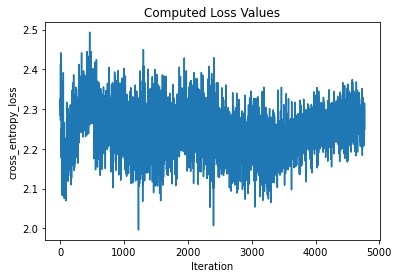

In [75]:
plt.title("Computed Loss Values")
plt.plot(history['loss_values'])
plt.ylabel("cross_entropy_loss")
plt.xlabel("Iteration")
plt.show()